In [1]:
%matplotlib inline
import pandas as pd
from db_scripts.get_server_data import data_dir, get_table_for_variable, fig_dir, get_table_for_variable
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerPathCollection
from operator import add
import matplotlib

Read in the data

In [23]:
df = pd.read_csv("{}reformat_by_event.csv".format(data_dir))
df.sort_values('flooded', inplace=True)
df

,rain_daily_sum,rain_hourly_max,rain_15_min_max,rain_prev_3_days,gw_elev_avg,tide_elev_avg,wind_dir_avg,wind_vel_avg,wind_vel_hourly_max_avg,num_flooded,flooded,event_name,event_date
1235,1.320000,3.200000e-01,0.12,1.345000e+00,2.441582,0.064875,128.836361,3.144236,5.075417,0.0,False,NaN,2013-04-29
1642,0.003333,1.000000e-02,0.01,1.496667e+00,1.689739,0.559250,147.391917,5.113208,7.807500,0.0,False,NaN,2014-06-14
1643,0.000000,6.643991e-16,0.00,3.366667e-01,1.578101,0.288250,169.818681,3.403194,5.331250,0.0,False,NaN,2014-06-15
1644,0.000000,6.643991e-16,0.00,3.333333e-03,1.563858,0.140667,209.645639,3.424917,5.590833,0.0,False,NaN,2014-06-16
1645,0.000000,6.643991e-16,0.00,-1.209102e-15,1.583206,0.199542,236.975764,4.348903,6.553750,0.0,False,NaN,2014-06-17
1646,0.000000,6.643991e-16,0.00,-1.209102e-15,1.604340,0.103917,258.216306,5.785333,7.832500,0.0,False,NaN,2014-06-18
1647,0.150000,2.200000e-01,0.13,9.933333e-01,1.780793,0.531583,147.416958,3.626736,5.954167,0.0,False,NaN,2014-06-21
1648,0.060000,9.000000e-02,0.05,2.100000e-01,1.767121,0.743375,95.885931,5.338986,7.985000,0.0,False,NaN,2014-06-22
1649,0.000000,6.730727e-16,0.00,2.100000e-01,1.621247,0.637667,99.921069,4.952097,7.464583,0.0,False,NaN,2014-06-23
1650,0.000000,6.730727e-16,0.00,6.000000e-02,1.567121,0.414625,141.779667,3.756833,6.165417,0.0,False,NaN,2014-06-24


In [3]:
df[(df.rain_daily_sum<0.1) & (df.flooded)]

,rain_daily_sum,rain_hourly_max,rain_15_min_max,rain_prev_3_days,gw_elev_avg,tide_elev_avg,wind_dir_avg,wind_vel_avg,wind_vel_hourly_max_avg,num_flooded,flooded,event_name,event_date
13,0.000,1.084202e-15,0.00,2.750000e-02,2.448416,0.826125,92.037028,12.906375,15.877083,1.0,True,unnamed,2015-09-17
22,0.005,1.000000e-02,0.01,1.585000e+00,3.117073,-0.058333,128.945722,4.902000,7.486250,1.0,True,unnamed,2016-07-20
23,0.000,1.405126e-15,0.00,-1.216909e-15,3.149425,0.104667,231.133653,8.253319,11.248750,1.0,True,Bernie Training,2016-07-25


I feel comfortable taking out 2.5 events (I am counting 'Bernie Training' as 0.5 of an event because it says 'Training') filtering on a daily rainfall of above 0.1 inches.

In [4]:
print len(df)
df = df[df.rain_daily_sum > 0.1]
print len(df)

2471
517


let's separate the features out

In [19]:
feat_df = df.iloc[:, :9]
feat_df.head()

,rain_daily_sum,rain_hourly_max,rain_15_min_max,rain_prev_3_days,gw_elev_avg,tide_elev_avg,wind_dir_avg,wind_vel_avg,wind_vel_hourly_max_avg
1235,1.320000,0.32,0.12,1.345000,2.441582,0.064875,128.836361,3.144236,5.075417
1647,0.150000,0.22,0.13,0.993333,1.780793,0.531583,147.416958,3.626736,5.954167
1641,0.333333,0.44,0.34,1.500000,1.781762,0.672500,223.510611,4.506931,7.102500
1640,1.160000,1.18,0.97,1.166667,1.730518,0.718458,138.969056,2.487292,4.498333
1625,0.370000,0.28,0.12,0.370000,2.017969,0.254292,197.951556,5.064556,7.821250


When I tried to do PCA it threw an error saying that my data contained NAN. So here's what I found:

In [22]:
n = feat_df.isnull().any(axis=1)
print sum(n)
feat_df[n]

174


,rain_daily_sum,rain_hourly_max,rain_15_min_max,rain_prev_3_days,gw_elev_avg,tide_elev_avg,wind_dir_avg,wind_vel_avg,wind_vel_hourly_max_avg
425,0.755,0.30,0.09,0.760,2.187163,-0.280083,NaN,NaN,NaN
427,0.260,0.16,0.16,1.015,2.630532,-0.628917,NaN,NaN,NaN
430,0.150,0.07,0.02,0.165,2.514490,-0.599875,NaN,NaN,NaN
431,0.140,0.07,0.02,0.290,2.430261,-0.560167,NaN,NaN,NaN
406,0.895,0.24,0.08,0.895,1.219828,-0.128792,NaN,NaN,NaN
407,0.810,0.49,0.17,1.705,1.641429,0.335333,NaN,NaN,NaN
415,0.830,0.34,0.12,0.840,2.180177,0.307750,NaN,NaN,NaN
469,0.305,0.22,0.12,0.320,2.183361,-0.350583,NaN,NaN,NaN
471,0.215,0.12,0.08,0.530,2.331999,0.361542,NaN,NaN,NaN
472,0.115,0.10,0.03,0.340,2.391025,1.176042,NaN,NaN,NaN


There is a bunch of shallow well depth data missing. Here's some more investigation:

3845
60120
0.0639554224884


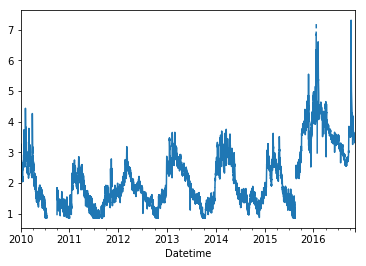

In [7]:
gw_df = get_table_for_variable('groundwater')
gw_df['Value'].plot()
print sum(gw_df['Value'].isnull())
print len(gw_df)
print 3845./60120

So approximately 6% of the gw data is NaN and from the figure a lot of that lookds like it happens at once like for a few months about 2/3 through 2010. I guess we just drop those ones.

In [8]:
df_filt = df[df['gw_elev_avg'].isnull()!= True]
df_filt.reset_index(inplace=True)
feat_df = df_filt.iloc[:, 1:7]

In [9]:
pca = PCA()

In [10]:
p = pca.fit(feat_df)
p.explained_variance_ratio_

array([ 0.55215018,  0.2463997 ,  0.0847108 ,  0.06809952,  0.04622979,
        0.00241002])

In [11]:
p_vis = pca.fit_transform(feat_df)
df_pca = pd.DataFrame(p_vis)
df_filt[df_filt.flooded].index.min()

476

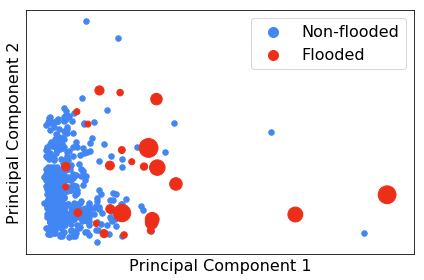

In [12]:
fig, ax = plt.subplots()
nfl = ax.scatter(df_pca.loc[:476,0], df_pca.loc[:476, 1], c='#4286f4', label='Non-flooded', s=30)
fl = ax.scatter(df_pca.loc[476:,0], df_pca.loc[476:, 1], c='#ed2f1a', s=30+df_filt.loc[476:, 'num_flooded']*6, label='Flooded')
ax.set_ylabel('Principal Component 2', fontsize=16)
ax.set_xlabel('Principal Component 1',  fontsize=16)
ax.set_xticks(())
ax.set_yticks(())
ax.tick_params(labelsize=16)
legend = ax.legend(fontsize=16, handler_map={fl: HandlerPathCollection(sizes=[100]), nfl: HandlerPathCollection(sizes=[100])})
fig.tight_layout()
fig.savefig('{}pc.png'.format(fig_dir), dpi=300)

I'm interested in the non-flooding points that are far away from the rest of the group.

In [13]:
high_pc1 = df_pca[df_pca[0]>8].index
high_pc1

Int64Index([48, 163, 485, 500], dtype='int64')

In [14]:
def plot_features(record_indicies, df):
    ax = df.iloc[record_indicies, [1, 2, 3, 4, 5, 6]].plot.bar(fontsize=14, rot=15, legend=False, figsize=(7, 5.5))
    patches, labels = ax.get_legend_handles_labels()
    label_units = ([' (in)', ' (in)', ' (in)', ' (in)', ' (ft)', ' (ft)'])
    labels = map(add, labels, label_units)
    ax.legend(patches, labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=14)
    print df.loc[record_indicies]
    ax.set_xticklabels(
        df.loc[record_indicies, 'event_name']+"\n"+ "(" +  df.loc[record_indicies, 'num_flooded'].astype(str)+")"
    )
    ax.set_xlabel('Event name \n (# locations flooded)', fontsize=14)
    fig  = plt.gcf()
    fig.tight_layout()

     index  rain_daily_sum  rain_hourly_max  rain_15_min_max  \
48    1702           7.510             9.30             3.50   
163   2435           4.335             1.47             0.60   
485      1           7.820             1.22             0.33   
500      0          10.255             1.59             0.67   

     rain_prev_3_days  gw_elev_avg  tide_elev_avg  wind_dir_avg  wind_vel_avg  \
48           8.826667     1.487029       0.284375    215.441833      2.992125   
163          9.502500     3.432301       0.956542     68.211181     12.859778   
485          8.245000     1.033844       1.493500           NaN           NaN   
500         11.695000     1.447289       1.111472           NaN           NaN   

     wind_vel_hourly_max_avg  num_flooded flooded event_name  event_date  
48                  5.099583          0.0   False        NaN  2014-08-18  
163                17.111667          0.0   False        NaN  2016-09-21  
485                      NaN         32.0    Tru

,index,rain_daily_sum,rain_hourly_max,rain_15_min_max,rain_prev_3_days,gw_elev_avg,tide_elev_avg,wind_dir_avg,wind_vel_avg,wind_vel_hourly_max_avg,num_flooded,flooded,event_name,event_date
48,1702,7.510,9.30,3.50,8.826667,1.487029,0.284375,215.441833,2.992125,5.099583,0.0,False,NaN,2014-08-18
163,2435,4.335,1.47,0.60,9.502500,3.432301,0.956542,68.211181,12.859778,17.111667,0.0,False,NaN,2016-09-21
485,1,7.820,1.22,0.33,8.245000,1.033844,1.493500,NaN,NaN,NaN,32.0,True,Irene,2011-08-27
500,0,10.255,1.59,0.67,11.695000,1.447289,1.111472,NaN,NaN,NaN,48.0,True,Nicole,2010-09-30


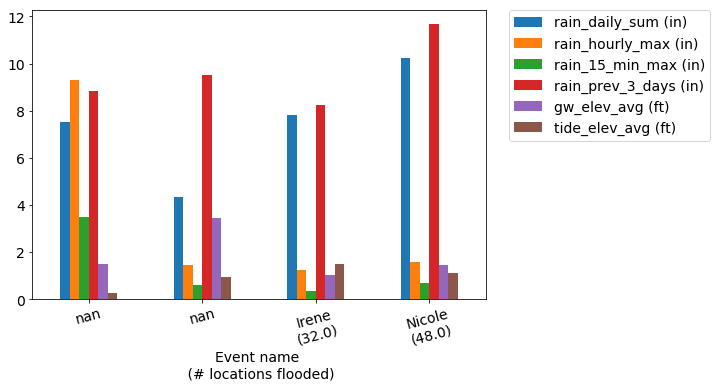

In [15]:
plot_features(high_pc1, df_filt)
df_filt.loc[high_pc1]

In [16]:
rain_df = get_table_for_variable('rainfall')

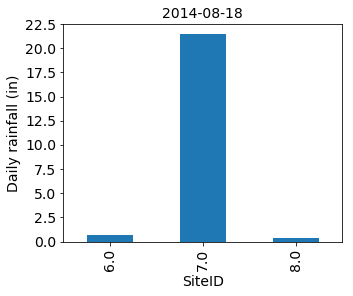

In [17]:
ax2 = rain_df['2014-08-18'].groupby('SiteID').sum()['Value'].plot.bar(figsize=(5,4), fontsize=14, title='2014-08-18')
ax2.set_ylabel('Daily rainfall (in)')
ax2.yaxis.label.set_size(14)
ax2.xaxis.label.set_size(14)
ax2.title.set_size(14)

     index  rain_daily_sum  rain_hourly_max  rain_15_min_max  \
153   2206          1.3500             0.57             0.18   
155   2217          0.7825             0.21             0.10   
491     17          0.9550             0.70             0.36   
492     18          1.6225             0.57             0.18   
152   2202          0.5075             0.20             0.07   
498     27          7.6125             1.43             0.51   

     rain_prev_3_days  gw_elev_avg  tide_elev_avg  wind_dir_avg  wind_vel_avg  \
153      1.350000e+00     6.997553       0.138792     59.372069     13.333569   
155      3.872500e+00     6.356799       0.347042    173.875764     10.169306   
491      2.305000e+00     4.987574       0.535250    230.453840     13.234111   
492      3.117500e+00     4.853232       0.443903    184.532130     11.907667   
152      1.825000e+00     4.734056       0.833542    117.486125     10.730889   
498     -4.996004e-16     4.794867       1.701608     83.758097  

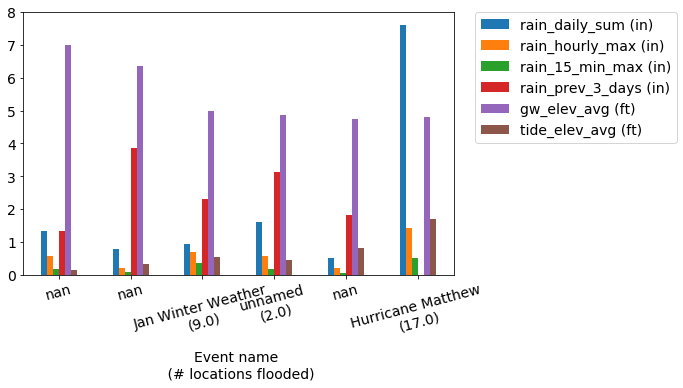

In [18]:
high_pc2 = df_pca.sort_values(1, ascending=False).index[:6]
plot_features(high_pc2, df_filt)
# df_filt.loc[high_pc2, :]